# MCT4001 Scientific Computing in Python Session 3
![mct-banner](https://raw.githubusercontent.com/wiki/MCT-master/Guides/assets/img/mct-banner.jpg)

In [1]:
# importing the package used in this notebook
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib

%config IPCompleter.greedy=True

## 1. Handling files and folders

When working with large collection of files (such as a database) it is handy to manage files and folder directly from the Python program. This can be used for both reading or writing files.

The package [os](https://docs.python.org/3/library/os.html) provides a vast amount of tools to exploit operating systems functionalities within Python programs. Here we just look at how we can load unknown files from known folders (i.e. we know the folder but we do not know, or want to manually list, the files that are inside).

In [2]:
# listing files in a directory
filenames = os.listdir('./files/samples')
print('Number of files',len(filenames))
print(filenames)

# The . in the directory path  represents the current working directory
# which is where your Python program (or Jupiter notebook is)

# Generally, it is recommended to use relative than absolute paths 
# because absolute paths are very likely to not work on other computers

Number of files 170
['snare_28.wav', 'snare_00.wav', 'snare_14.wav', 'snare_15.wav', 'snare_01.wav', 'snare_29.wav', 'snare_17.wav', 'snare_03.wav', 'intruder.txt', 'snare_02.wav', 'snare_16.wav', 'snare_12.wav', 'snare_06.wav', 'clap41.wav', 'clap40.wav', 'snare_07.wav', 'snare_13.wav', 'snare_05.wav', 'snare_11.wav', 'snare_39.wav', 'snare_38.wav', 'snare_10.wav', 'snare_04.wav', 'kick_07.wav', 'kick_13.wav', 'clap30.wav', 'clap24.wav', 'clap18.wav', 'cymbal29.wav', 'cymbal01.wav', 'cymbal15.wav', 'cymbal14.wav', 'cymbal00.wav', 'cymbal28.wav', 'clap19.wav', 'clap25.wav', 'clap31.wav', 'kick_12.wav', 'kick_06.wav', 'kick_10.wav', 'kick_04.wav', 'kick_38.wav', 'clap27.wav', 'clap33.wav', 'cymbal16.wav', 'cymbal02.wav', 'cymbal03.wav', 'cymbal17.wav', 'clap32.wav', 'clap26.wav', 'kick_39.wav', 'kick_05.wav', 'kick_11.wav', 'kick_29.wav', 'kick_15.wav', 'kick_01.wav', 'clap22.wav', 'clap36.wav', 'cymbal13.wav', 'cymbal07.wav', 'cymbal06.wav', 'cymbal12.wav', 'clap37.wav', 'clap23.wav', 

In [3]:
filenames = os.listdir('./files/samples')

# printing files one by one in a for loop
# perhaps we can do more than just printing the name, such as loading and processing the files
for file in filenames:
    print(file)

snare_28.wav
snare_00.wav
snare_14.wav
snare_15.wav
snare_01.wav
snare_29.wav
snare_17.wav
snare_03.wav
intruder.txt
snare_02.wav
snare_16.wav
snare_12.wav
snare_06.wav
clap41.wav
clap40.wav
snare_07.wav
snare_13.wav
snare_05.wav
snare_11.wav
snare_39.wav
snare_38.wav
snare_10.wav
snare_04.wav
kick_07.wav
kick_13.wav
clap30.wav
clap24.wav
clap18.wav
cymbal29.wav
cymbal01.wav
cymbal15.wav
cymbal14.wav
cymbal00.wav
cymbal28.wav
clap19.wav
clap25.wav
clap31.wav
kick_12.wav
kick_06.wav
kick_10.wav
kick_04.wav
kick_38.wav
clap27.wav
clap33.wav
cymbal16.wav
cymbal02.wav
cymbal03.wav
cymbal17.wav
clap32.wav
clap26.wav
kick_39.wav
kick_05.wav
kick_11.wav
kick_29.wav
kick_15.wav
kick_01.wav
clap22.wav
clap36.wav
cymbal13.wav
cymbal07.wav
cymbal06.wav
cymbal12.wav
clap37.wav
clap23.wav
kick_00.wav
kick_14.wav
kick_28.wav
kick_02.wav
kick_16.wav
clap09.wav
clap35.wav
clap21.wav
cymbal04.wav
cymbal10.wav
cymbal38.wav
cymbal39.wav
cymbal11.wav
cymbal05.wav
clap20.wav
clap34.wav
clap08.wav
kick_17.w

In [4]:
filenames = os.listdir('./files/samples')

# doing the same but with the aid of an integer index
# this can be handy when we also need the index to access numpy or pandas data
for i in range(len(filenames)):
    print(filenames[i])

snare_28.wav
snare_00.wav
snare_14.wav
snare_15.wav
snare_01.wav
snare_29.wav
snare_17.wav
snare_03.wav
intruder.txt
snare_02.wav
snare_16.wav
snare_12.wav
snare_06.wav
clap41.wav
clap40.wav
snare_07.wav
snare_13.wav
snare_05.wav
snare_11.wav
snare_39.wav
snare_38.wav
snare_10.wav
snare_04.wav
kick_07.wav
kick_13.wav
clap30.wav
clap24.wav
clap18.wav
cymbal29.wav
cymbal01.wav
cymbal15.wav
cymbal14.wav
cymbal00.wav
cymbal28.wav
clap19.wav
clap25.wav
clap31.wav
kick_12.wav
kick_06.wav
kick_10.wav
kick_04.wav
kick_38.wav
clap27.wav
clap33.wav
cymbal16.wav
cymbal02.wav
cymbal03.wav
cymbal17.wav
clap32.wav
clap26.wav
kick_39.wav
kick_05.wav
kick_11.wav
kick_29.wav
kick_15.wav
kick_01.wav
clap22.wav
clap36.wav
cymbal13.wav
cymbal07.wav
cymbal06.wav
cymbal12.wav
clap37.wav
clap23.wav
kick_00.wav
kick_14.wav
kick_28.wav
kick_02.wav
kick_16.wav
clap09.wav
clap35.wav
clap21.wav
cymbal04.wav
cymbal10.wav
cymbal38.wav
cymbal39.wav
cymbal11.wav
cymbal05.wav
clap20.wav
clap34.wav
clap08.wav
kick_17.w

In [5]:
filenames = os.listdir('./files/samples')

#printing only if the name includes a specific string
for file in filenames:
    if file.find('snare') != -1: #find returns the starting position (integer) of the substring if found, otherwise -1
        print(file)

snare_28.wav
snare_00.wav
snare_14.wav
snare_15.wav
snare_01.wav
snare_29.wav
snare_17.wav
snare_03.wav
snare_02.wav
snare_16.wav
snare_12.wav
snare_06.wav
snare_07.wav
snare_13.wav
snare_05.wav
snare_11.wav
snare_39.wav
snare_38.wav
snare_10.wav
snare_04.wav
snare_41.wav
snare_40.wav
snare_intruder.txt
snare_21.wav
snare_35.wav
snare_34.wav
snare_20.wav
snare_08.wav
snare_36.wav
snare_22.wav
snare_23.wav
snare_37.wav
snare_33.wav
snare_27.wav
snare_26.wav
snare_32.wav
snare_24.wav
snare_30.wav
snare_18.wav
snare_19.wav
snare_31.wav
snare_25.wav


In [6]:
filenames = os.listdir('./files/samples')

#printing only if the name includes a specific extension (can be done with the above as well, but this approach is more solid)
for file in filenames:
    if file.endswith('.' + 'wav'): #selecting files by extensions (extension does not guarantee much about the file content)
        print(file)

snare_28.wav
snare_00.wav
snare_14.wav
snare_15.wav
snare_01.wav
snare_29.wav
snare_17.wav
snare_03.wav
snare_02.wav
snare_16.wav
snare_12.wav
snare_06.wav
clap41.wav
clap40.wav
snare_07.wav
snare_13.wav
snare_05.wav
snare_11.wav
snare_39.wav
snare_38.wav
snare_10.wav
snare_04.wav
kick_07.wav
kick_13.wav
clap30.wav
clap24.wav
clap18.wav
cymbal29.wav
cymbal01.wav
cymbal15.wav
cymbal14.wav
cymbal00.wav
cymbal28.wav
clap19.wav
clap25.wav
clap31.wav
kick_12.wav
kick_06.wav
kick_10.wav
kick_04.wav
kick_38.wav
clap27.wav
clap33.wav
cymbal16.wav
cymbal02.wav
cymbal03.wav
cymbal17.wav
clap32.wav
clap26.wav
kick_39.wav
kick_05.wav
kick_11.wav
kick_29.wav
kick_15.wav
kick_01.wav
clap22.wav
clap36.wav
cymbal13.wav
cymbal07.wav
cymbal06.wav
cymbal12.wav
clap37.wav
clap23.wav
kick_00.wav
kick_14.wav
kick_28.wav
kick_02.wav
kick_16.wav
clap09.wav
clap35.wav
clap21.wav
cymbal04.wav
cymbal10.wav
cymbal38.wav
cymbal39.wav
cymbal11.wav
cymbal05.wav
clap20.wav
clap34.wav
clap08.wav
kick_17.wav
kick_03.wa

In [7]:
filenames = os.listdir('./files/samples')

#printing only if snare wave files (i.e. combination of previous two cells)
for file in filenames:
    if (file.find('snare') != -1) and (file.endswith('.' + 'wav')): #selecting files by extensions (extension does not guarantee much about the file content)
        print(file)

snare_28.wav
snare_00.wav
snare_14.wav
snare_15.wav
snare_01.wav
snare_29.wav
snare_17.wav
snare_03.wav
snare_02.wav
snare_16.wav
snare_12.wav
snare_06.wav
snare_07.wav
snare_13.wav
snare_05.wav
snare_11.wav
snare_39.wav
snare_38.wav
snare_10.wav
snare_04.wav
snare_41.wav
snare_40.wav
snare_21.wav
snare_35.wav
snare_34.wav
snare_20.wav
snare_08.wav
snare_36.wav
snare_22.wav
snare_23.wav
snare_37.wav
snare_33.wav
snare_27.wav
snare_26.wav
snare_32.wav
snare_24.wav
snare_30.wav
snare_18.wav
snare_19.wav
snare_31.wav
snare_25.wav


In [8]:
# another approach using 'walk'
for (dirpath, dirnames, filenames) in os.walk('./files/samples'):
    for f in filenames:
        if f.endswith('.' + 'wav'):
            print(f)

snare_28.wav
snare_00.wav
snare_14.wav
snare_15.wav
snare_01.wav
snare_29.wav
snare_17.wav
snare_03.wav
snare_02.wav
snare_16.wav
snare_12.wav
snare_06.wav
clap41.wav
clap40.wav
snare_07.wav
snare_13.wav
snare_05.wav
snare_11.wav
snare_39.wav
snare_38.wav
snare_10.wav
snare_04.wav
kick_07.wav
kick_13.wav
clap30.wav
clap24.wav
clap18.wav
cymbal29.wav
cymbal01.wav
cymbal15.wav
cymbal14.wav
cymbal00.wav
cymbal28.wav
clap19.wav
clap25.wav
clap31.wav
kick_12.wav
kick_06.wav
kick_10.wav
kick_04.wav
kick_38.wav
clap27.wav
clap33.wav
cymbal16.wav
cymbal02.wav
cymbal03.wav
cymbal17.wav
clap32.wav
clap26.wav
kick_39.wav
kick_05.wav
kick_11.wav
kick_29.wav
kick_15.wav
kick_01.wav
clap22.wav
clap36.wav
cymbal13.wav
cymbal07.wav
cymbal06.wav
cymbal12.wav
clap37.wav
clap23.wav
kick_00.wav
kick_14.wav
kick_28.wav
kick_02.wav
kick_16.wav
clap09.wav
clap35.wav
clap21.wav
cymbal04.wav
cymbal10.wav
cymbal38.wav
cymbal39.wav
cymbal11.wav
cymbal05.wav
clap20.wav
clap34.wav
clap08.wav
kick_17.wav
kick_03.wa

In [9]:
# we can also go one level up and this will get all wave files in a folder
        
for (dirpath, dirnames, filenames) in os.walk('./files'):
    print(dirnames)
    print(dirpath)
    for f in filenames:
        if f.endswith('.' + 'wav'):
            print(f)

['database', '__pycache__', 'samples', 'puredata']
./files
HelloWorld.wav
IR_damped_cave.wav
HelloWorld2.wav
HelloWorld3.wav
Drums.wav
IR_small_church.wav
Loop.wav
IR_jamespeacock4616__car.wav
IR_flanger_space.wav
IR__tosha73__ir-brown-cab-audix-i5-center.wav
[]
./files/database
53d1ed2b.wav
76fdce1b.wav
37b2166d.wav
c3263833.wav
54bb57af.wav
54777c28.wav
be3d113e.wav
508e8e56.wav
b0d9849d.wav
24218e25.wav
2a85260b.wav
49e3587e.wav
7eb959ec.wav
4d68f059.wav
10da16fb.wav
5e4477e9.wav
d14f5df1.wav
c88c6a4b.wav
75916a91.wav
6ab76c9a.wav
74cfa1eb.wav
5de123c3.wav
5e5bca7a.wav
367ad7b1.wav
67ed3008.wav
84f46494.wav
5689818f.wav
6afc5c3b.wav
be4f26c0.wav
826f23dd.wav
1bcf0664.wav
756fc6fa.wav
6b15affb.wav
6a210ffa.wav
3071420d.wav
bb9c5fff.wav
82d58fa4.wav
c1427da5.wav
62ff9fde.wav
515a7743.wav
380ca85c.wav
17f82c05.wav
5c5f3234.wav
73ffc53f.wav
70a2e253.wav
b4b2b68d.wav
651633e2.wav
73508c62.wav
214ddd6b.wav
67f5ced8.wav
1e0d7652.wav
c08227e9.wav
699385f4.wav
0356dec7.wav
76e07b91.wav
60ccc

Another useful package for handling files and folder is [glob](https://docs.python.org/3/library/glob.html).

#### Task 1

Write a cell of code that print the duration (in seconds) of all cymbal wave files in the folder ./files/samples. You should reuse the function you have developed for Task 3 in Session 2.

## 2. Basic file I/O

#### Text files

Writing data to a text file (equivalent of printing) can be useful in several context (e.g. exporting data, redirecting to a text to a file lenghty print messages for debug, etc...).

 When opening a file, we use the following modes:

 ``r''   Open text file for reading.  The stream is positioned at the
         beginning of the file.

 ``r+''  Open for reading and writing.  The stream is positioned at the
         beginning of the file.

 ``w''   Truncate file to zero length or create text file for writing.
         The stream is positioned at the beginning of the file.

 ``w+''  Open for reading and writing.  The file is created if it does not
         exist, otherwise it is truncated.  The stream is positioned at
         the beginning of the file.

 ``a''   Open for writing.  The file is created if it does not exist.  The
         stream is positioned at the end of the file.  Subsequent writes
         to the file will always end up at the then current end of file,
         irrespective of any intervening fseek(3) or similar.

 ``a+''  Open for reading and writing.  The file is created if it does not
         exist.  The stream is positioned at the end of the file.  Subse-
         quent writes to the file will always end up at the then current
         end of file, irrespective of any intervening fseek(3) or similar.

In [10]:

# create a 2D array with 3 rows containing 4 random numbers
data = np.random.rand(3,4)

# opening the file we want to write into (this will create the file if it not exists)
fp = open('./files/my_file.txt', "w") #change to "a" to append to the existing file

# writing some text
fp.write('This file contains random numbers\n'.format(data))

# this will iterate over the rows
for row in data:
    fp.write('{}\n'.format(row)) #fp.write needs the "\n" new line terminator (EOL - end of line)
    #print('row data: {}'.format(row), file=fp) #alternative
    #print('row data: ',format(row), file=fp) #alternative
    
fp.close()

# opening in read mode and displaying all contents
fp = open('./files/my_file.txt', "r")
contents = fp.read()
print(contents)


This file contains random numbers
[0.30714434 0.07706529 0.54440787 0.09116424]
[0.7233839  0.47835291 0.77519385 0.31211828]
[0.74368977 0.12461093 0.86728848 0.55814287]



In [11]:
# reading all lines and printing one at a time
fp = open('./files/my_file.txt', "r")
lines = fp.readlines()

for line in lines:
    print(line) 

fp.close()

This file contains random numbers

[0.30714434 0.07706529 0.54440787 0.09116424]

[0.7233839  0.47835291 0.77519385 0.31211828]

[0.74368977 0.12461093 0.86728848 0.55814287]



In [12]:
# reading and printing one line at a time from the file (better with large files)
fp = open('./files/my_file.txt', "r")
line = fp.readline()
while line:
    print(line)
    line = fp.readline()
    
fp.close()

This file contains random numbers

[0.30714434 0.07706529 0.54440787 0.09116424]

[0.7233839  0.47835291 0.77519385 0.31211828]

[0.74368977 0.12461093 0.86728848 0.55814287]



#### Binary files

When writing data (i.e. numbers) is more convenient to use binary files. As opposite to text files, we can not open and eventually modify text files with a text editor. However, savign data to a binary file produces a significant smaller file size.

In [13]:
def sine_synth(freq, dur_ms, amp=1, pha=0, sr=48000):

    t = np.arange(0,dur_ms/1000,1/sr)
    s = amp*np.sin(2*np.pi*freq*t+pha)
    
    return s

# generating a sine signal
signal = sine_synth(50,100)

# opening the file we want to write into in binary mode (add the "b") - (this will create the file if it not exists)
fp = open('./files/my_file.bin', "wb") #change to "ab" to append to the existing file


# this will iterate over the samples
for sample in signal:
    fp.write(sample) # we have to do this one value at a time
    
fp.close()

# reading back the file (not decoding the contents)
fp = open('./files/my_file.bin', "rb")
fileContent = fp.read()
fp.close()

print(type(fileContent))
print(fileContent) #however saving plainn binary files require to convert back bytes to something else (using struct.unpack) using prior knowledge on what is the contents of the binary file


<class 'bytes'>
b'\x00\x00\x00\x00\x00\x00\x00\x00\xd7\xd0bh\xdd\xcez?\xa8\xa0,\xc7\xb7\xce\x8a?"\x8e\x12\xcc\xda\x1a\x94?\x90\xca\x90C!\xce\x9a?\xedjY=\x8e\xc0\xa0?\xf7\xe0v\xd1\xdc\x19\xa4?;W_\xf7\xf2r\xa7?\r\xc9\xefH\xc7\xcb\xaa?\x13\x00\xbe`P$\xae?\x8bz\x19mB\xbe\xb0?J\x97\xd2\xa8-j\xb2?I\x8e92\xe5\x15\xb4?\xda\xb8\x8eXd\xc1\xb5?\x82\xbc\xb0k\xa6l\xb7?,\xb4)\xbc\xa6\x17\xb9?kW<\x9b`\xc2\xba?\xd0\x1f\xf1Z\xcfl\xbc?\xf9k#N\xee\x16\xbe?Z\xa0\x8e\xc8\xb8\xc0\xbf?\xd0\xa2m\x0f\x15\xb5\xc0?2\x12V\xd3\x9e\x89\xc1?\x15\xafU[\xf7]\xc2?\xba\xc1KS\x1c2\xc3?uS\xa8g\x0b\x06\xc4?\x93\xb6rE\xc2\xd9\xc4?\xad\x0cP\x9a>\xad\xc5?3\xcb\x89\x14~\x80\xc6?.>\x14c~S\xc7?&\t\x955=&\xc8?\n\xa6i<\xb8\xf8\xc8?(\xe2\xad(\xed\xca\xc9?\xf5XB\xac\xd9\x9c\xca?\xc9\xec\xd2y{n\xcb?D=\xddD\xd0?\xcc?\x7f\x1b\xb7\xc1\xd5\x10\xcd?\xcc\xfb\x94\xa5\x89\xe1\xcd?\x0ee\x90\xa6\xe9\xb1\xce?\x8d]\xae{\xf3\x81\xcf?\x99\xearn\xd2(\xd0?\x90\x06\x93\xc1}\x90\xd0?G~.\x94\xfa\xf7\xd0?q\xd9\xbe\xc3G_\xd1?j[C.d\xc6\xd1?d1D\xb2N-\xd2?\

## 3. Numpy file I/O

A better approach to save and reload data as binary files is to use the Numpy file I/O functions. This also allows to export multiple arrays into a single file as well as compress the file (try this on your own). For more details check out this [guide](https://numpy.org/doc/stable/reference/routines.io.html).

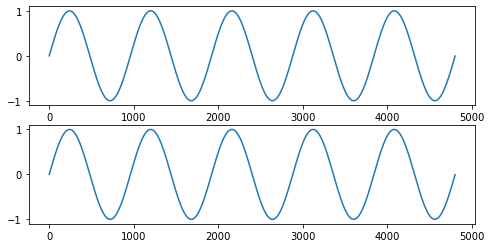

In [14]:
def sine_synth(freq, dur_ms, amp=1, pha=0, sr=48000):

    t = np.arange(0,dur_ms/1000,1/sr)
    s = amp*np.sin(2*np.pi*freq*t+pha)
    
    return s

# generating a sine signal
signal = sine_synth(50,100)

# saving to file (both text and binary) using Numpy
fp = open('./files/my_numpy_file.bin', "wb")
np.save(fp, signal)
fp.close()

fp = open('./files/my_numpy_file.txt', "wb")
np.savetxt(fp, signal)
fp.close()

#reloading and displaying the data
restored_bin = np.load('./files/my_numpy_file.bin')
restored_txt = np.loadtxt('./files/my_numpy_file.txt')
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(restored_txt)
plt.subplot(2, 1, 2)
plt.plot(restored_bin)


In Python everything is an object (from soimething as small as an integer, as something as large as an artificial neural network). Using [joblib](https://joblib.readthedocs.io/en/latest/) we can save to and restore from file any object in Python. Joblib also allows to compress the binary file (check the joblib.dump documentation).

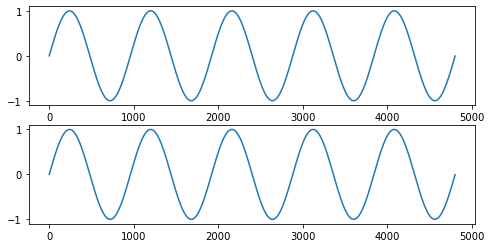

In [15]:
def sine_synth(freq, dur_ms, amp=1, pha=0, sr=48000):

    t = np.arange(0,dur_ms/1000,1/sr)
    s = amp*np.sin(2*np.pi*freq*t+pha)
    
    return s

# generating a sine signal
signal = sine_synth(50,100)

# saving to file (both text and binary) using Numpy
joblib.dump(signal, './files/my_numpy_file.pkl') 

#reloading and displaying the data
signal = joblib.load('./files/my_numpy_file.pkl') 

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(restored_txt)
plt.subplot(2, 1, 2)
plt.plot(restored_bin)

#### Task 2

Create an array of arbitrary size and shape containing random numbers.
Save to array to a file and restore it using 3 methods (as text, as binary and using joiblib).

Compare the 3 resotred arrays with the original and check if they are identical.

To compare a pair of arrays you can use [numpy.array_equal](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html) and/or you can simply subtract the two arrays and ensure that the mean (i.e) absolute value of the subtraction (i.e. the error) is a reasonably small number (in this way you allow some tolerance in terms of numerical precision).

## 4. CSV files and Pandas

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html) is an extensive Python package for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Often tablular data is stored in CSV (Comma Separated Value) files or in more complex one such as MS Excel files. Using Pandas we can create tables and export these to CSV (or XLSX) files, for further processing/analysis in other environment, or vice versa. 

In [16]:
# creating a pandas data structure from lists
name = ['Bob','Jessica','Mary','John','Mel']
age = [13, 34, 18, 24, 72]

df = pd.DataFrame() # empty dataframe

df['Name'] = name
df['Age'] = age

df

,Name,Age
0,Bob,13
1,Jessica,34
2,Mary,18
3,John,24
4,Mel,72


In [17]:
# creating a pandad data structure from numpy
numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])

# two possibilites to display the contents
print(df)
df

      column1  column2
row1        1        2
row2        3        4


,column1,column2
row1,1,2
row2,3,4


In [18]:
# defining a dictionary containing Students data
data = {'Name': ['Maria', 'Steve', 'Mel', 'Kay'],
        'Height': [160, 166, 170, 155],
        'Degree': ['Msc', 'MA', 'Msc', 'Bsc']}
  
# convert the dictionary into DataFrame
df = pd.DataFrame(data)
  
# Declare a list that is to be converted into a column
hometown = ['Perth', 'Kyoto', 'Azul', 'Damascus']
  
# Using 'Address' as the column name
# and equating it to the list
df['Hometown'] = hometown

# exporting to file
# index is True by default and it will also export the c
df.to_csv('./files/my_file.csv', index=False)

# restoring from file
restored_df = pd.read_csv('./files/my_file.csv')

restored_df

,Name,Height,Degree,Hometown
0,Maria,160,Msc,Perth
1,Steve,166,MA,Kyoto
2,Mel,170,Msc,Azul
3,Kay,155,Bsc,Damascus


Refere to the following documentation pages for more details (such as compression) on [pandas to csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) and [csv to pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [19]:
#extracting only height or hometown (by column name)
print(df['Height'])
print('') #empty line

print(df['Hometown'])
print('')

#displaying a single element (2th row, 3st column)
print(df.iloc[2,3])
print('')

#changing a single element
df.iloc[2,3] = 'Austin'
print(df.iloc[2,3])
print('')

# iterating over the rows
for index, row in df.iterrows():
    print(row)
print('')

# iterating over the rows using only a selection of columns
for index, row in df.iterrows():
    print(row['Name'],row['Height'])
print('')

0    160
1    166
2    170
3    155
Name: Height, dtype: int64

0       Perth
1       Kyoto
2        Azul
3    Damascus
Name: Hometown, dtype: object

Azul

Austin

Name        Maria
Height        160
Degree        Msc
Hometown    Perth
Name: 0, dtype: object
Name        Steve
Height        166
Degree         MA
Hometown    Kyoto
Name: 1, dtype: object
Name           Mel
Height         170
Degree         Msc
Hometown    Austin
Name: 2, dtype: object
Name             Kay
Height           155
Degree           Bsc
Hometown    Damascus
Name: 3, dtype: object

Maria 160
Steve 166
Mel 170
Kay 155



In [20]:
# a csv file is just a text file, we can open it and parse it manually without pandas
fp = open('./files/my_file.csv')

#reading the file line by line (strip the final 'new line' character), keeping track of on which line we are (with cnt)
line = fp.readline().strip()
cnt = 0
while line:
    print('Line',cnt,':',line)
    #print('Line {}: {}'.format(cnt, line))   # alternative to do the same as line 8
    line = fp.readline().strip()
    cnt += 1

#closing the file
fp.close()

Line 0 : Name,Height,Degree,Hometown
Line 1 : Maria,160,Msc,Perth
Line 2 : Steve,166,MA,Kyoto
Line 3 : Mel,170,Msc,Azul
Line 4 : Kay,155,Bsc,Damascus


#### Task 3

Given the dataframe in the example above (i.e. the one restored from './files/my_file.csv'), write a Python cell  that
1. extracts only the data (i.e. full rows) of people with a Msc Degree.
2. extract data of people ledd than 165 cm tall
3. computes mean and standard deviation (or variance) of the height of all paersons in the database
